# Machine Learning

_The following notebook is an implementation of IoT intrustion detection using machine learning.   The aim is to distigusih between **intrusive** traffic (attack) and **normal** traffic (not attack)._    
The flow of the notebook is as follows:  

1.Pre-processing.   

2.Feature Selection.   

3.Selecting machine learning algorithms.   

4.Refining algorithms.  

5.Evavulating model.   



In [2]:
#Linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# warnings
import warnings
warnings.filterwarnings('ignore')

## Pre-processing

In [5]:
train_data = 'trainn.csv'

In [6]:
#Assigning names to the data set
col_names = []
with open('col_names.txt') as cols_fp:
    for line_num, name in enumerate(cols_fp):
        col_names.append(name.rstrip())

In [7]:
#reading the data
data = pd.read_csv('trainn.csv',names = col_names)


In [8]:
#size of the data
data.shape

(97044, 152)

In [9]:
#first few records to review data and format
data.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,...,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,data.len,class
0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0


In [10]:
#last few records to review data and format
data.tail()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,...,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,data.len,class
0,0,0,0.035953,0.035953,0.038562,0.038562,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,1
0,0,0,0.018075,0.018075,0.038562,0.038562,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,1
0,0,0,0.041889,0.041889,0.038562,0.038562,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,1
0,0,0,0.004191,0.004191,0.038562,0.038562,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,1
0,0,0,0.002892,0.002892,0.038562,0.038562,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,1


In [11]:
#Statistical summary - descriptive statistics
data.describe()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,...,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,data.len,class
count,97044.0,97044.0,97044.000000,97044.000000,97044.000000,97044.000000,97044.0,97044.0,97044.0,97044.0,...,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.000000
mean,0.0,0.0,0.006252,0.006252,0.193837,0.193837,0.0,0.0,0.0,0.0,...,0.028436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178474,0.500000
std,0.0,0.0,0.015541,0.015541,0.354444,0.354444,0.0,0.0,0.0,0.0,...,0.062765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360078,0.500003
min,0.0,0.0,0.000003,0.000003,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.001442,0.001442,0.037908,0.037908,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.003706,0.003706,0.037908,0.037908,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023873,0.500000
75%,0.0,0.0,0.005916,0.005916,0.054902,0.054902,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023873,1.000000
max,0.0,0.0,0.978440,0.978440,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


Attack: 48522 (50.0 percent), Not Attack: 48522 (50.0 percent), Total: 97044


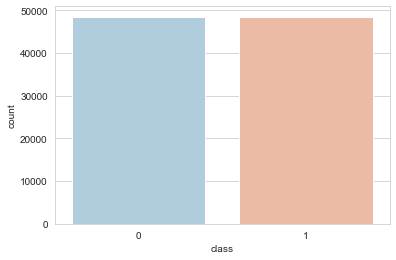

In [12]:
# Class Distribution
attack = data[data['class']==1]
not_attack = data[data['class']==0]

print("Attack: %i (%.1f percent), Not Attack: %i (%.1f percent), Total: %i"\
      %(len(attack), 1.*len(attack)/len(data)*100.0,\
        len(not_attack), 1.*len(not_attack)/len(data)*100.0, len(data)))
sb.set_style('whitegrid')
sb.countplot(x='class',data= data, palette='RdBu_r')


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97044 entries, 0 to 0
Columns: 152 entries, frame.interface_id to class
dtypes: float64(48), int64(104)
memory usage: 115.8 MB


In [14]:
# Type and number of datatypes in the dataset
data.dtypes.value_counts()

int64      104
float64     48
dtype: int64

In [15]:
# checking for the columns that are in numerical and object datatype
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

print('Numerical feature size: {}'.format(len(numerical_features)))
print('Categorical feature size: {} '.format(len(categorical_features)))

Numerical feature size: 152
Categorical feature size: 0 


In [16]:
# number of missing values
data.isnull().sum()

frame.interface_id              0
frame.dlt                       0
frame.offset_shift              0
frame.time_delta                0
frame.time_delta_displayed      0
                               ..
wlan.qos.buf_state_indicated    0
wlan.qos.bit4                   0
wlan.qos.txop_dur_req           0
data.len                        0
class                           0
Length: 152, dtype: int64

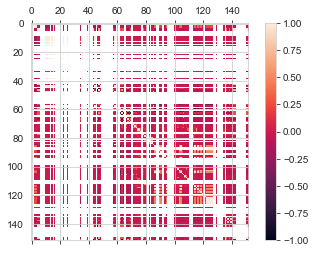

In [17]:
#correlation matrix
correlations = data.corr() 
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [18]:
#  Normalise data
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X) 
normalizedX = scaler.transform(X) 
# summarize transformed data 
set_printoptions(precision=3) 
print("Normalised Samples \n", normalizedX[0:5,:])
# Decision tree classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results1 = cross_val_score(model, X, Y, cv=kfold) 
print("Mean estimated accuracy \n",results1.mean())
# Decision tree classification on normalised data
results2 = cross_val_score(model, normalizedX, Y, cv=kfold)
print("Mean estimated accuracy on normalised data \n",results2.mean())

Normalised Samples 
 [[0.    0.    0.005 0.005 0.707 0.707 0.    0.   ]
 [0.    0.    0.707 0.707 0.    0.    0.    0.   ]
 [0.    0.    0.318 0.318 0.632 0.632 0.    0.   ]
 [0.    0.    0.038 0.038 0.706 0.706 0.    0.   ]
 [0.    0.    0.315 0.315 0.633 0.633 0.    0.   ]]
Mean estimated accuracy 
 1.0
Mean estimated accuracy on normalised data 
 1.0


In [19]:
# Skewed data
num_feats=data.dtypes[data.dtypes != 'object'].index
skew_feats = data[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({"Skew":skew_feats})
skewness

,Skew
wlan_mgt.fixed.capabilities.agility,311.518860
wlan_mgt.rsn.capabilities.no_pairwise,311.518860
wlan_mgt.rsn.capabilities.peerkey,311.518860
wlan.seq,220.273693
wlan_mgt.fixed.listen_ival,211.958023
...,...
radiotap.present.rate,-67.957971
radiotap.present.db_antnoise,-67.957971
radiotap.present.fhss,-67.957971
wlan.ba.bm,-67.957971


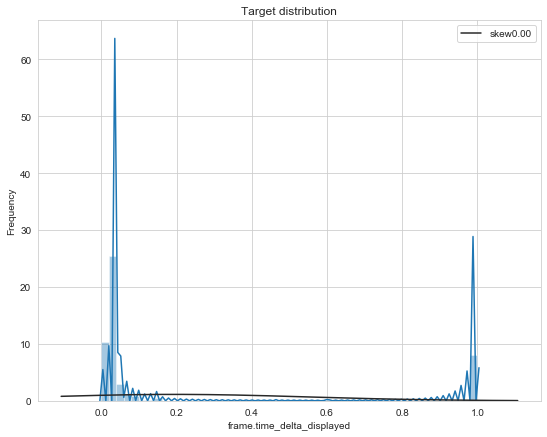

In [20]:
from scipy import stats


plt.figure(figsize=(9,7))
sb.distplot(data['frame.time_delta_displayed'],fit=stats.norm)
plt.legend(['skew{:.2f}'.format(data['class'].skew())],loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution');

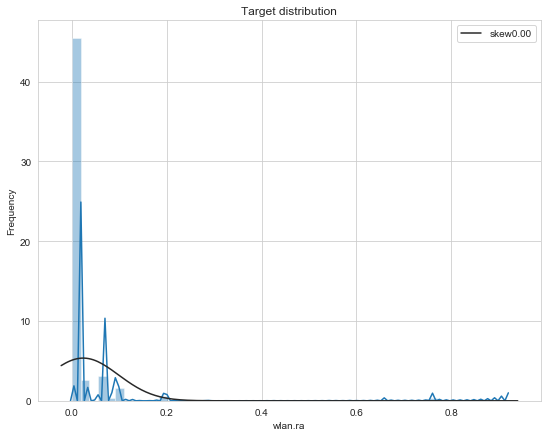

In [21]:
plt.figure(figsize=(9,7))
sb.distplot(data['wlan.ra'],fit=stats.norm)
plt.legend(['skew{:.2f}'.format(data['class'].skew())],loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution');

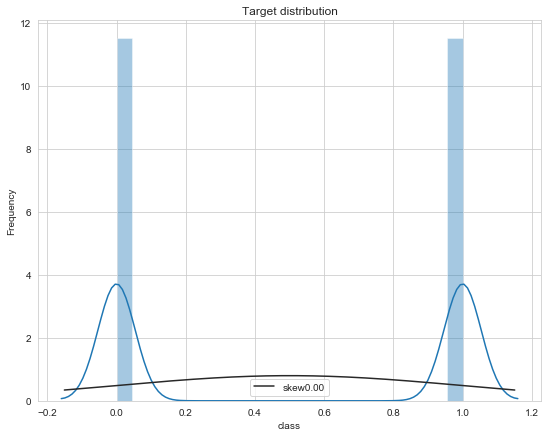

In [22]:
# Distribution Plot
from scipy import stats
plt.figure(figsize=(9,7))
sb.distplot(data['class'],fit=stats.norm)
plt.legend(['skew{:.2f}'.format(data['class'].skew())],loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution');

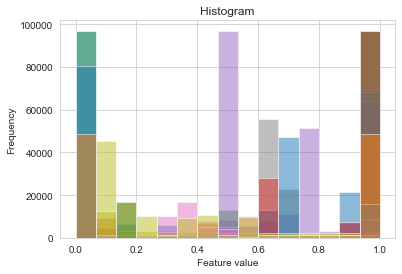

In [23]:
df = pd.DataFrame(data) 
df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

## Feature Selection

In [24]:
#Checking and droping Unique values
c = list()
for i in range(len(data.columns)):
    if(len(np.unique(data.iloc[:,i])) == 1):
        c.append(data.columns[i])
        
data.drop(c,axis = 1, inplace = True)


In [25]:
#size of the data after dropping unique values(153-79 =74)
# 74 coloumns are dropped as they arent useful for decision tree or random forest.
data.shape

(97044, 79)

In [26]:
# Data Split
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

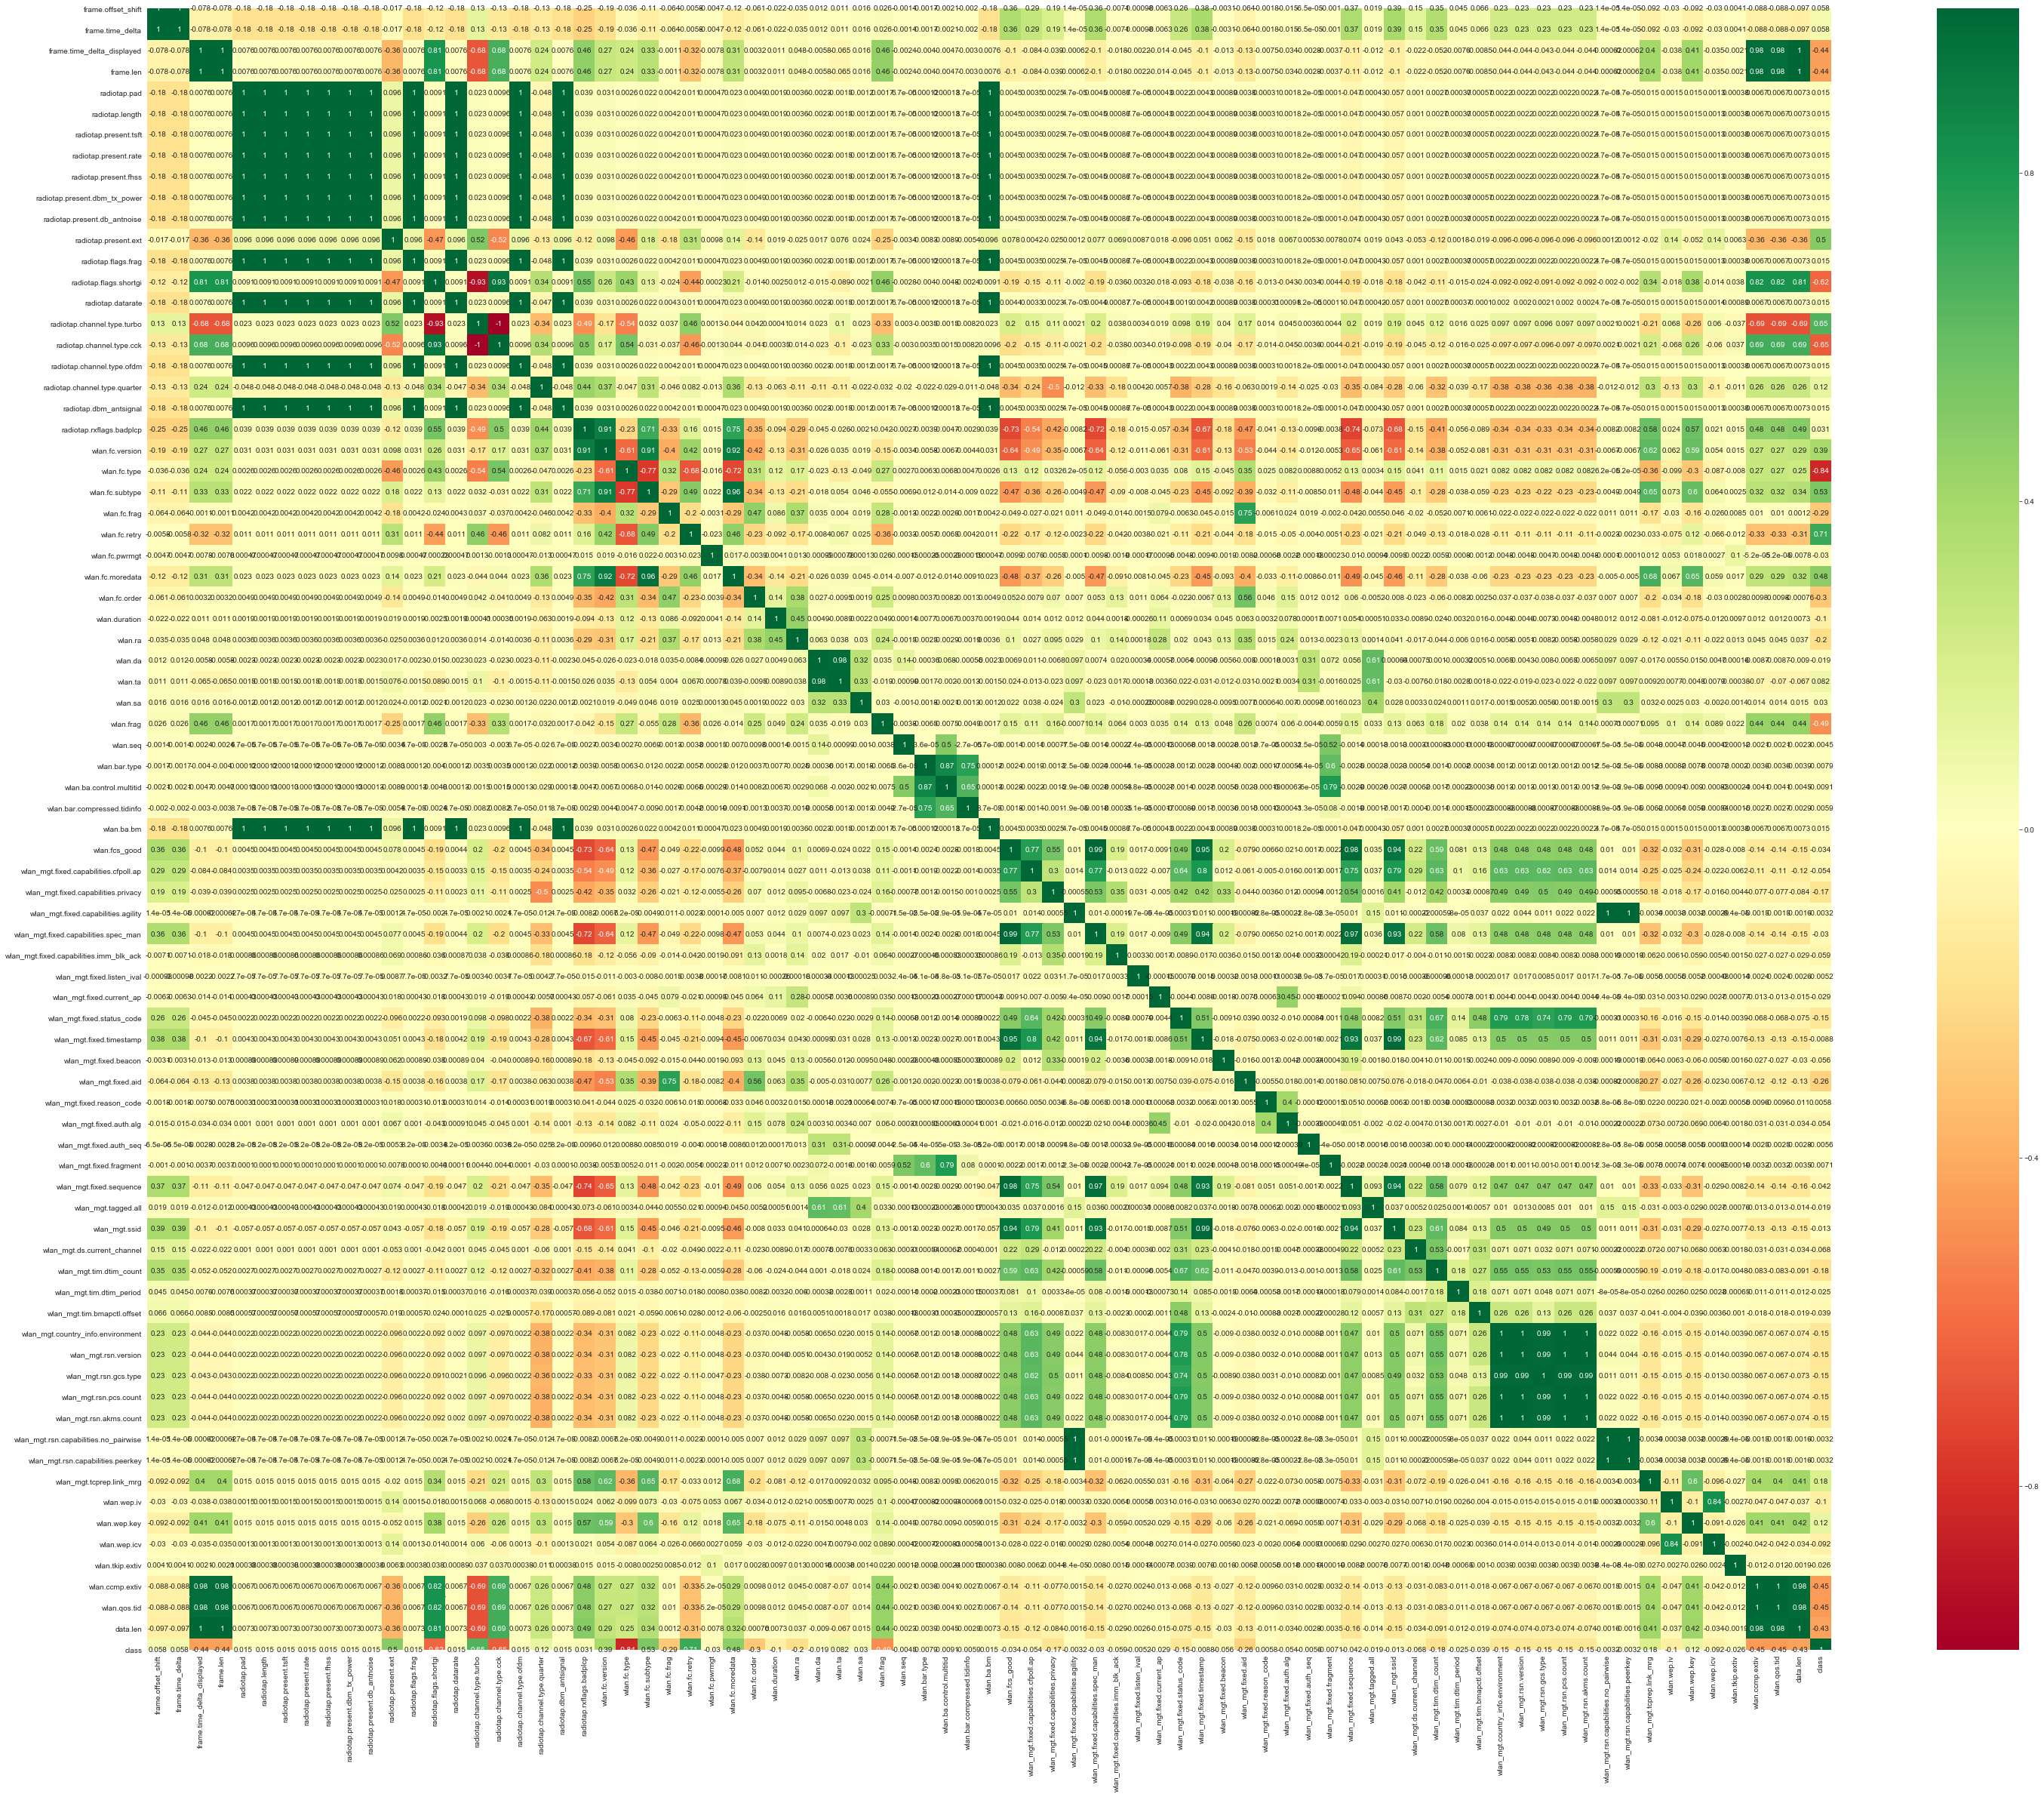

In [27]:
import seaborn as sns
#get correlations of each features in dataset
corr_mat = data.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(50,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [29]:
best_features = SelectKBest(score_func = chi2,k=10)
fit = best_features.fit(X,y)

In [30]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [31]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns


In [32]:
featureScores

,Features,Score
0,frame.offset_shift,12.789531
1,frame.time_delta,12.789531
2,frame.time_delta_displayed,12076.290588
3,frame.len,12076.290588
4,radiotap.pad,0.004545
...,...,...
73,wlan.wep.icv,537.599152
74,wlan.tkip.extiv,33.609096
75,wlan.ccmp.extiv,2759.555170
76,wlan.qos.tid,2759.555170


In [33]:
print(featureScores.nlargest(15,'Score'))

                               Features         Score
25                        wlan.fc.retry  32124.682195
16            radiotap.channel.type.cck  28936.000138
22                         wlan.fc.type  28321.490224
13               radiotap.flags.shortgi  24346.021809
77                             data.len  13311.733744
15          radiotap.channel.type.turbo  12317.666392
2            frame.time_delta_displayed  12076.290588
3                             frame.len  12076.290588
23                      wlan.fc.subtype   7911.296191
34                            wlan.frag   7720.479234
24                         wlan.fc.frag   7308.000547
27                     wlan.fc.moredata   6539.649962
75                      wlan.ccmp.extiv   2759.555170
76                         wlan.qos.tid   2759.555170
42  wlan_mgt.fixed.capabilities.privacy   2668.287812


In [34]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=30

In [35]:
# Correlation with y for each feature.
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not attack, 1 for attack
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

30 selected features


In [36]:
cor_feature

['wlan.wep.key',
 'radiotap.channel.type.quarter',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.version',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.tcprep.link_mrg',
 'wlan_mgt.tim.dtim_count',
 'wlan.ra',
 'wlan_mgt.fixed.aid',
 'wlan.fc.frag',
 'wlan.fc.order',
 'wlan.fc.version',
 'data.len',
 'frame.len',
 'frame.time_delta_displayed',
 'wlan.qos.tid',
 'wlan.ccmp.extiv',
 'wlan.fc.moredata',
 'wlan.frag',
 'radiotap.present.ext',
 'wlan.fc.subtype',
 'radiotap.flags.shortgi',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.turbo',
 'wlan.fc.retry',
 'wlan.fc.type']

In [37]:
#Chi- square test

from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

30 selected features


In [38]:
chi_feature

['frame.time_delta_displayed',
 'frame.len',
 'radiotap.present.ext',
 'radiotap.flags.shortgi',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.moredata',
 'wlan.ra',
 'wlan.frag',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.icv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'data.len']

In [39]:
# Recurssive feature elimination.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)


Fitting estimator with 78 features.
Fitting estimator with 68 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=30, step=10, verbose=5)

In [40]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

30 selected features


In [41]:
rfe_feature

['frame.time_delta_displayed',
 'frame.len',
 'radiotap.present.ext',
 'radiotap.flags.shortgi',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.quarter',
 'radiotap.rxflags.badplcp',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.da',
 'wlan.ta',
 'wlan.frag',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv']

In [42]:
# LASSO method
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=30, norm_order=1, prefit=False, threshold=None)

In [43]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

30 selected features


In [44]:
embeded_lr_feature


['frame.time_delta_displayed',
 'frame.len',
 'radiotap.present.db_antnoise',
 'radiotap.present.ext',
 'radiotap.flags.shortgi',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.quarter',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.da',
 'wlan.frag',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.ssid',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key']

In [45]:
#Random Forest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [46]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

22 selected features


In [47]:
embeded_rf_feature

['frame.offset_shift',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.len',
 'radiotap.present.ext',
 'radiotap.flags.shortgi',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.quarter',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.retry',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.frag',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.key',
 'data.len']

In [48]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'Recursive Feature Elmination':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,Recursive Feature Elmination,Logistics,Random Forest,Total
1,wlan_mgt.tcprep.link_mrg,True,True,True,True,True,5
2,wlan.frag,True,True,True,True,True,5
3,wlan.fc.type,True,True,True,True,True,5
4,wlan.fc.subtype,True,True,True,True,True,5
5,wlan.fc.retry,True,True,True,True,True,5
6,radiotap.present.ext,True,True,True,True,True,5
7,radiotap.flags.shortgi,True,True,True,True,True,5
8,radiotap.channel.type.turbo,True,True,True,True,True,5
9,frame.time_delta_displayed,True,True,True,True,True,5
10,frame.len,True,True,True,True,True,5


## Selecting Machine Learning algorithms

In [49]:
feat_names = featureScores.nlargest(15,'Score')['Features']

data_test = pd.read_csv('test.csv',names = col_names)

test_X = data_test.iloc[1:,0:-1]
test_X_part = test_X[feat_names]
test_y = data_test.iloc[1:,-1]

In [ ]:
import time

X_train_subset = X[feat_names]

In [51]:
# applying RandomForest using only the most important features
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

time_st = time.time()
new_model = ensemble.RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0, warm_start = True)

new_model.fit(X_train_subset, y)
time_stop = time.time()

st = time.time()
new_model_predict = new_model.predict(test_X_part)
sto = time.time()

print("Accuracy: " + str(new_model.score(test_X_part, test_y)))

print(str(time_stop - time_st) + " sec " + str(sto-st) + " sec ")

Accuracy: 0.5345883759151352
2.3365795612335205 sec 0.3318324089050293 sec 


In [49]:
# applying DecisionTreeClassifier on the most important features
from sklearn.tree import DecisionTreeClassifier
time_st = time.time()
model_DecTree = DecisionTreeClassifier()

model_DecTree.fit(X_train_subset, y)
time_stop = time.time()

st = time.time()
model_DecTree_predict = model_DecTree.predict(test_X_part)
sto = time.time()
print("Accuracy with feature selection: " + str(model_DecTree.score(test_X_part, test_y)))
print(str(time_stop - time_st) + " sec " + str(sto-st) + " sec ")



Accuracy with feature selection: 0.5361820807809153
0.07877492904663086 sec 0.006041049957275391 sec 


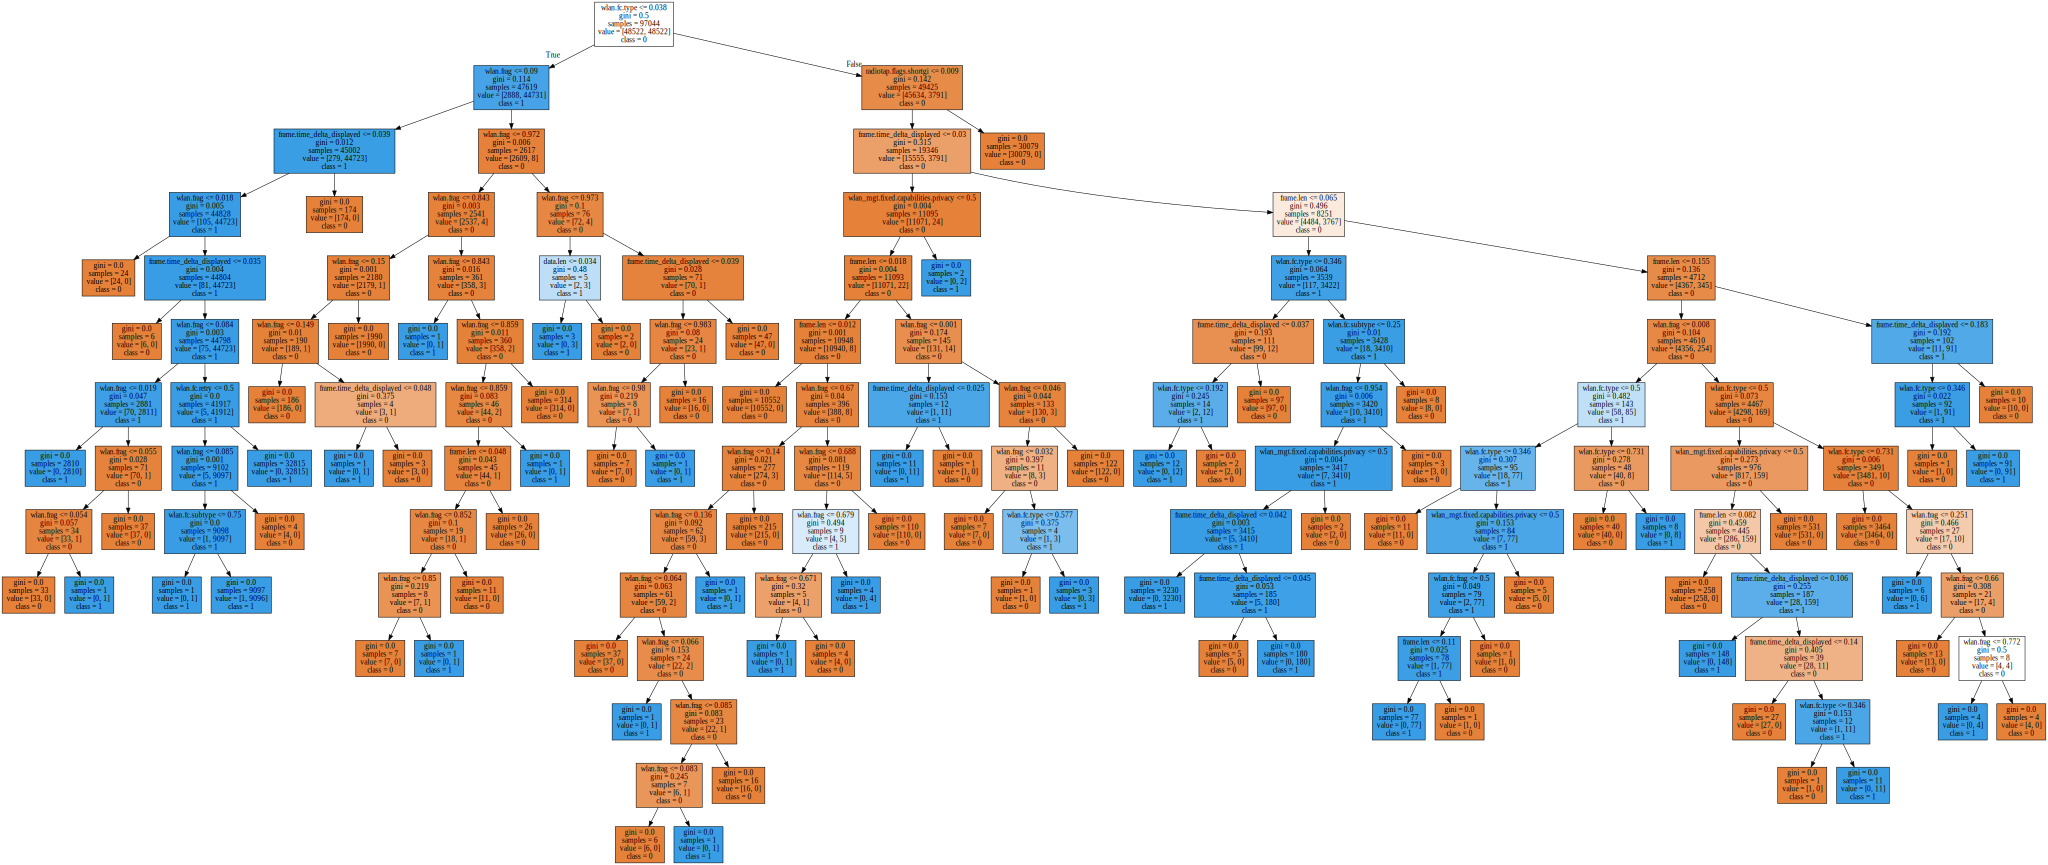

In [52]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, HTML
%matplotlib inline

labels = list(feat_names)
graph = Source(tree.export_graphviz(model_DecTree, 
                                    out_file=None, 
                                    feature_names=labels, 
                                    class_names=['0', '1'], 
                                    filled = True))

display(SVG(graph.pipe(format='svg')))



In [53]:
from sklearn import datasets
from sklearn import svm

start_linear = time.time()
svr_linear = svm.SVC(kernel='linear', C=1, gamma = 'auto')
svr_linear.fit(X_train_subset, y)
stop_linear = time.time()


st = time.time()
svr_linear_predict = svr_linear.predict(test_X_part)
sto = time.time()
print("(Important features) The accuracy for Support Vector Machine with linear kernel: " + str(svr_linear.score(test_X_part, test_y)) + " time: " + str(stop_linear - start_linear) + " seconds " + str(sto - st) + "sec")



(Important features) The accuracy for Support Vector Machine with linear kernel: 0.9836147218486977 time: 15.601816654205322 seconds 1.9469759464263916sec


In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(svr_linear_predict, test_y))


[[19456    35]
 [  623 20044]]


In [55]:
start_rbf = time.time()
svr_rbf = svm.SVC(kernel='rbf', C=16, gamma = 0.01)
svr_rbf.fit(X_train_subset, y)
stop_rbf = time.time()

st = time.time()
svr_rbf_predict = svr_rbf.predict(test_X_part)
sto = time.time()
print("(Important features) The accuracy for Vector Machine with RBF kernel: " + str(svr_rbf.score(test_X_part, test_y)) + " time: " +  str(stop_rbf - start_rbf) + " seconds " + str(sto - st) + "sec")



(Important features) The accuracy for Vector Machine with RBF kernel: 0.9826684595846407 time: 25.68644404411316 seconds 4.579814195632935sec


In [56]:
start_poly = time.time()
svr_poly = svm.SVC(kernel='poly', C=32, gamma=0.01, degree=4, coef0=1)
svr_poly.fit(X_train_subset, y)
stop_poly = time.time()

st = time.time()
svr_poly_predict = svr_poly.predict(test_X_part)
sto = time.time()


print("(Important features) The accuracy for Vector Machine with Polynomial kernel: " + str(svr_poly.score(test_X_part, test_y)) + " time: " +  str(stop_poly - start_poly) + " seconds " + str(sto - st) + "sec")

(Important features) The accuracy for Vector Machine with Polynomial kernel: 0.9882464266148713 time: 15.87454891204834 seconds 2.1617209911346436sec


In [57]:
# Neural Networks - MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, mean_squared_error

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=500)
mlp.fit(X_train_subset,y)

mlp_predict_test = mlp.predict(test_X_part)
print("Accuracy: " + str(mlp.score(test_X_part, test_y)))

Accuracy: 0.5331191792419941


In [52]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

nn_model = Sequential()
nn_model.add(Dense(32, input_dim = 15, activation = "relu"))
nn_model.add(Dense(32, activation="relu"))
nn_model.add(Dense(1, activation="sigmoid"))

time_st = time.time()
nn_model.compile(optimizer = "sgd", loss='binary_crossentropy', metrics=["accuracy"])

nn_model_predict = nn_model.fit(X_train_subset, y, epochs=100, validation_split=0.33)
time_stop = time.time()

print(str(time_stop - time_st) + " sec " + str(sto-st) + " sec ")




Train on 65019 samples, validate on 32025 samples
Epoch 1/100





65019/65019 [==============================] - 3s 53us/step - loss: 0.1411 - acc: 0.9621 - val_loss: 0.4284 - val_acc: 0.8954
Epoch 2/100
65019/65019 [==============================] - 3s 46us/step - loss: 0.0618 - acc: 0.9808 - val_loss: 0.3962 - val_acc: 0.8954
Epoch 3/100
65019/65019 [==============================] - 3s 43us/step - loss: 0.0530 - acc: 0.9827 - val_loss: 0.3642 - val_acc: 0.8954
Epoch 4/100
65019/65019 [==============================] - 3s 45us/step - loss: 0.0480 - acc: 0.9836 - val_loss: 0.3461 - val_acc: 0.8954
Epoch 5/100
65019/65019 [==============================] - 4s 54us/step - loss: 0.0445 - acc: 0.9846 - val_loss: 0.3761 - val_acc: 0.8954
Epoch 6/100
65019/65019 [==============================] - 4s 64us/step - loss: 0.0417 - acc: 0.9852 - val_loss: 0.3467 - val_acc: 0.8958
Epoch 7/100
65019/65019 [==============================] - 4s 60us/step - loss: 0.0393 - acc: 0.9857 - val_loss: 0

In [53]:
# testing data from test.csv
st = time.time()
print(nn_model.evaluate(test_X_part, test_y)[1])
sto = time.time()

print( str(time_stop - time_st) + "sec " + str(sto-st) + " sec ")

40158/40158 [==============================] - 1s 13us/step
0.5230838189152847
287.98762130737305sec 0.5125987529754639 sec 


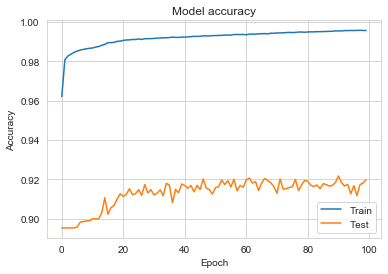

In [54]:
plt.plot(nn_model_predict.history['acc'])
plt.plot(nn_model_predict.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "bottom right")
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


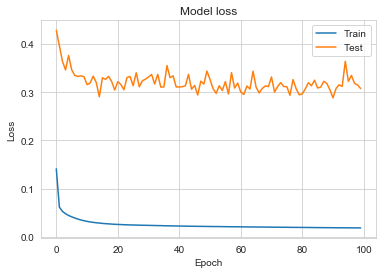

In [55]:
print(nn_model_predict.history.keys())
plt.plot(nn_model_predict.history['loss'])
plt.plot(nn_model_predict.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "bottom right")
plt.show()

## Refining algorithm
Chosen Model: SVM

In [ ]:
from sklearn import datasets
import time
from sklearn.model_selection import RandomizedSearchCV
#Parameter =[{'C': [1,16,32], 'gamma' = 'auto', 'kernel':['linear']},{'C':[1,16,32], 'gamma':[0.001,0.0001], 'kernel':['rbf']}
parameter ={'kernel':['linear','poly'],'C':[1,8,16,32], 'gamma':[0.01], 'degree':[3,4,5],'coef0':[1,2,3]}
rmSearchSVM=RandomizedSearchCV(estimator=svm.SVC(), param_distributions=parameter, cv=5, n_jobs=5, n_iter=5)
rmSearchSVM.fit(test_X_part,test_y)
rmSearchSVM.cv_results_
df=pd.DataFrame(rmSearchSVM.cv_results_)
print(df)
df[['param_C','param_kernel','mean_test_score']]
rmSearchSVM.best_params_

In [ ]:
from sklearn import datasets
import time
from sklearn.model_selection import RandomizedSearchCV
#Parameter =[{'C': [1,16,32], 'gamma' = 'auto', 'kernel':['linear']},{'C':[1,16,32], 'gamma':[0.001,0.0001], 'kernel':['rbf']}
parameter ={'kernel':['poly'],'C':[16,32], 'gamma':[0.01], 'degree':[3,4,5],'coef0':[1,2,3]}
rmSearchSVM=RandomizedSearchCV(estimator=svm.SVC(), param_distributions=parameter, cv=5, n_jobs=5, n_iter=5)
rmSearchSVM.fit(test_X_part,test_y)
rmSearchSVM.cv_results_
df=pd.DataFrame(rmSearchSVM.cv_results_)
print(df)
df[['param_C','param_kernel','mean_test_score']]
rmSearchSVM.best_params_

In [ ]:
start_poly = time.time()
svr_poly = svm.SVC(kernel='poly', C=32, gamma=0.01, degree=3, coef0=2)
svr_poly.fit(X_train_subset, y)
stop_poly = time.time()

st = time.time()
svr_poly_predict = svr_poly.predict(test_X_part)
sto = time.time()


print("(Important features) The accuracy for Vector Machine with Polynomial kernel: " + str(svr_poly.score(test_X_part, test_y)) + " time: " +  str(stop_poly - start_poly) + " seconds " + str(sto - st) + "sec")

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(svr_poly_predict, test_y))